In [17]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
#import the dataset
data = datasets.load_breast_cancer()

In [12]:
print(df['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [13]:
data2 = datasets.load_breast_cancer(return_X_y=True)

In [14]:
print(data2)

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 

In [21]:
data_ss = StandardScaler().fit_transform(data.data)
df = pd.DataFrame(data_ss, columns=data.feature_names)
y = pd.Series(data.target)

In [22]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [23]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [24]:
x = df.iloc[:, [0,1,2,3]].values

In [25]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 2 2 3 2 0 1 4 4 4 1 1 2 1 4 4 0 1 2 0 0 3 0 2 1 1 4 1 4 1 1 3 1 2 1 1 4
 0 4 4 4 3 2 4 4 1 3 0 0 4 4 0 3 1 4 3 1 4 0 3 3 3 4 3 4 4 3 3 3 0 1 3 1 0
 0 1 0 1 2 0 3 0 2 2 3 1 4 1 4 0 4 4 0 0 1 2 3 3 3 0 4 3 3 3 3 0 3 3 2 3 3
 4 0 3 3 4 3 0 1 1 3 1 2 0 0 0 4 1 0 2 0 1 1 0 1 4 3 3 0 3 3 1 3 0 3 0 3 0
 0 0 4 3 3 3 0 3 1 1 0 3 3 1 1 4 2 0 3 1 1 0 0 0 0 3 3 3 3 1 4 0 2 2 1 3 4
 3 1 3 3 0 4 4 3 4 4 0 4 1 1 0 3 1 2 4 0 0 3 1 4 0 2 3 2 1 4 0 3 3 2 2 0 0
 3 1 0 0 3 0 4 4 1 4 4 2 3 4 2 2 4 4 0 0 3 4 2 3 0 0 4 3 2 3 2 1 1 0 2 0 1
 4 2 1 1 1 1 2 3 4 0 3 0 3 2 3 1 3 3 1 0 0 2 3 1 1 0 0 3 0 3 3 0 0 0 3 0 0
 3 3 0 4 1 3 2 3 3 4 0 3 0 0 3 0 0 3 3 0 0 1 3 0 3 2 0 2 0 0 0 3 1 1 0 0 3
 3 3 1 0 1 3 2 0 3 3 2 3 3 3 0 3 3 3 1 2 4 3 0 0 0 3 3 0 4 0 1 0 2 2 3 2 2
 1 0 2 2 0 1 3 4 0 3 3 3 4 0 0 4 0 0 3 2 3 3 1 2 3 0 0 0 3 3 1 0 0 0 0 3 0
 4 1 3 3 3 3 4 4 4 3 1 0 3 3 0 3 0 3 3 3 3 3 0 4 0 2 1 0 0 0 0 0 0 3 1 0 3
 1 4 1 0 0 2 4 2 4 0 0 4 4 4 4 4 1 2 4 3 0 0 4 3 1 3 3 4 0 4 3 0 4 0 3 1 3
 0 0 0 0 0 0 1 3 1 4 1 1 

array([[-0.15485603, -0.7271416 , -0.17328115, -0.24004226],
       [ 0.92655753,  0.22313252,  0.92128468,  0.82991071],
       [ 2.018461  ,  0.84938623,  2.03055724,  2.15275061],
       [-0.97266595, -0.47815191, -0.96162248, -0.85463755],
       [-0.22824749,  1.18117204, -0.22049496, -0.28633917]])

# Elbow Method

Got the implementation from this website: https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

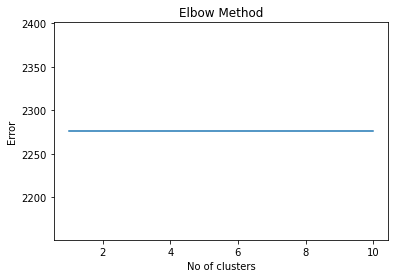

In [26]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=1).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

This obviously shows that the number of clusters chosen was not right. There needs to be a graph that shows a steep decline to determine the right number of clusters

## Second Approach with all features

In [28]:
kmeans5_2 = KMeans(n_clusters=5)
y_kmeans5_2 = kmeans5.fit_predict(df)
print(y_kmeans5_2)

kmeans5.cluster_centers_

[3 2 2 4 2 4 2 4 4 4 0 2 3 2 4 4 2 4 2 1 1 1 4 2 2 3 4 2 4 2 3 4 2 2 4 2 4
 0 0 4 0 1 3 4 0 2 1 4 1 0 0 0 0 2 0 0 2 4 0 1 1 1 4 1 4 2 1 0 4 0 2 1 4 1
 0 2 1 3 3 0 1 4 3 2 1 2 1 2 1 1 0 1 0 0 2 2 1 1 1 1 0 1 0 1 1 4 1 0 3 1 1
 1 4 1 1 1 1 4 4 2 1 2 3 1 0 0 0 2 1 2 1 2 2 0 2 0 0 0 2 1 0 2 1 0 0 1 4 1
 1 0 1 4 4 1 1 0 2 0 0 0 1 2 2 1 2 0 0 2 2 0 1 0 4 1 0 0 4 4 0 0 3 3 2 0 0
 1 2 0 0 0 4 0 0 4 4 0 4 2 2 4 1 2 3 4 1 0 1 2 4 0 2 0 3 2 4 4 1 0 2 2 0 1
 1 2 0 0 1 0 0 4 2 0 0 2 1 0 3 2 0 2 0 0 4 0 2 1 0 4 1 1 3 0 3 2 2 1 3 4 3
 4 2 0 2 0 2 3 1 0 0 1 0 1 3 1 2 1 0 2 0 0 2 0 2 4 0 0 1 0 1 0 4 0 1 0 0 0
 0 0 0 1 3 1 3 1 0 0 0 0 0 0 0 0 0 0 1 0 0 2 4 0 1 2 1 3 0 0 0 0 2 2 2 1 1
 0 0 2 1 2 1 3 1 1 1 2 1 1 0 0 1 1 0 4 3 2 0 1 1 0 1 1 0 0 0 0 0 2 3 0 2 3
 4 0 2 2 0 1 4 0 0 4 1 0 0 1 0 0 0 0 1 2 1 1 2 3 1 0 1 0 0 0 4 0 0 0 0 1 0
 0 2 0 0 1 0 0 0 1 1 3 0 0 1 4 1 0 1 0 1 0 0 0 4 1 2 2 0 1 0 0 0 0 1 2 0 0
 2 1 2 0 0 2 1 2 0 1 0 0 1 0 0 0 2 3 0 0 0 4 1 1 3 1 1 0 0 0 1 0 0 0 1 4 0
 0 1 0 1 4 0 2 1 0 0 0 2 

array([[-0.3408769 , -0.16789921, -0.38041249, -0.37206431, -0.80804261,
        -0.78903913, -0.70655908, -0.70782184, -0.60850642, -0.58724455,
        -0.46682952, -0.11904791, -0.47942545, -0.39936452, -0.47378996,
        -0.60708446, -0.49988204, -0.64672746, -0.28004405, -0.51372749,
        -0.40687759, -0.18186307, -0.44133034, -0.4229074 , -0.77857652,
        -0.64989364, -0.65675115, -0.70169061, -0.44340824, -0.6305559 ],
       [-0.73980608, -0.38700705, -0.72436294, -0.68333531,  0.38477842,
        -0.17716241, -0.43823815, -0.45767172,  0.09563381,  0.47917804,
        -0.38652005,  0.12933719, -0.37346029, -0.42388554,  0.61157161,
        -0.03809017, -0.12298026, -0.06073993,  0.19940746,  0.14419161,
        -0.73234726, -0.40737171, -0.71633173, -0.66089675,  0.29194645,
        -0.30895015, -0.42829674, -0.47221653, -0.17554626,  0.03715303],
       [ 1.2074887 ,  0.48469352,  1.17453307,  1.15709726,  0.15232385,
         0.33114329,  0.65240883,  0.91637905,  0

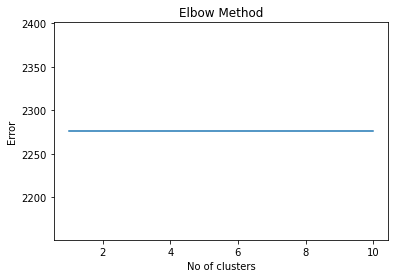

In [30]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=1).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Same error. Time to choose a different value for cluster

## Third approach with 3 cluster

In [42]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(df)
print(y_kmeans3)



[1 1 1 2 1 2 1 2 2 2 0 2 1 0 2 2 0 2 1 0 0 0 2 1 1 1 2 1 2 1 1 2 1 1 2 2 2
 0 0 2 0 2 1 2 0 1 0 2 0 0 0 0 0 1 0 0 1 2 0 0 0 0 2 0 2 2 0 0 2 0 1 2 2 0
 0 1 0 1 1 0 0 2 1 1 0 1 0 1 0 2 0 0 0 0 2 1 0 0 0 2 0 0 0 0 0 2 0 0 1 0 0
 2 2 0 0 0 0 2 2 0 0 1 1 0 0 0 0 1 2 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 2 2 0
 0 0 0 2 2 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 2 0 0 0 2 2 0 0 1 1 0 0 0
 0 0 0 0 0 2 0 0 2 2 0 2 1 1 2 0 1 1 2 0 0 0 0 2 0 1 0 1 2 2 2 2 0 1 1 0 0
 0 2 0 0 0 0 0 2 2 0 0 1 0 0 1 1 0 1 0 0 2 0 1 0 0 2 0 0 1 0 1 0 1 0 1 2 1
 2 1 0 1 0 1 1 0 0 0 2 0 0 1 0 0 0 0 0 0 0 1 0 1 2 0 0 0 0 2 0 2 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 1 0 0 0 0 2 2 2 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 2 1 2 0 0 2 0 0 0 0 0 0 0 0 1 1 0 1 1
 2 0 1 1 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 1 0 0 2 1 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 2 0 1 1 0 2 0 0 0 0 2 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 2 0 1 0 0 0 0 1 

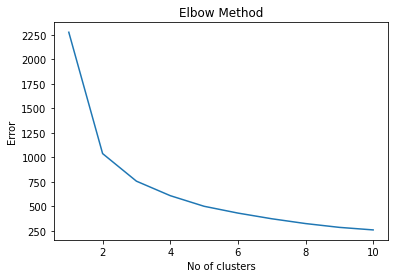

In [43]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The previous datasets were wrong for a personal error in keeping cluster at 1 and not changing iteratively


It looks like there is the elbow steep at 3 clusters meaning that we chose correctly

# Visualizing the Clustering

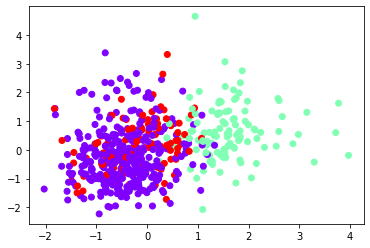

In [49]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans3, cmap='rainbow')

It appears that the purple and red cluster interchange many points so it might be better to have two clusters.

# Attempt with two clusters

In [50]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(df)
print(y_kmeans2)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

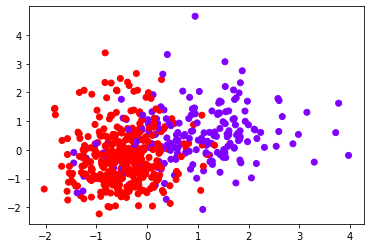

In [51]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans2, cmap='rainbow')